In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\adita\OneDrive\Desktop\Data_Science\Churn_predict\raw data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.shape

(7043, 21)

In [7]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

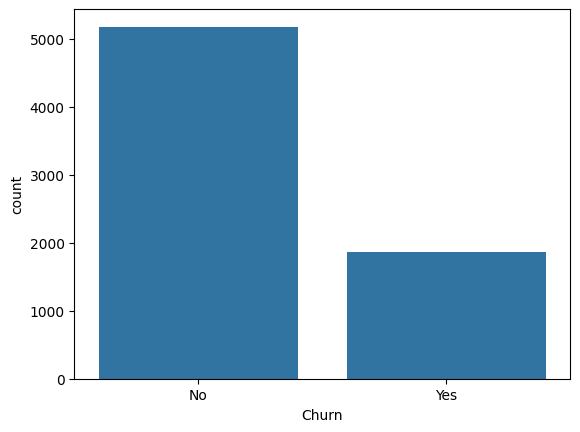

In [8]:
sns.countplot(x='Churn', data=df)
plt.show()

In [9]:
df = df.drop(['customerID'], axis=1)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()  # Check for NaNs
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [12]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [13]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [14]:
from sklearn.preprocessing import StandardScaler
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
df['ContractType_LongTerm'] = df['Contract_Two year'] + df['Contract_One year']
df['High_MonthlyCharges'] = (df['MonthlyCharges'] > df['MonthlyCharges'].median()).astype(int)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [18]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [19]:
y_pred = logreg.predict(X_test)
# Basic metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8048261178140526
Precision: 0.6551724137931034
Recall: 0.5588235294117647
F1 Score: 0.6031746031746031


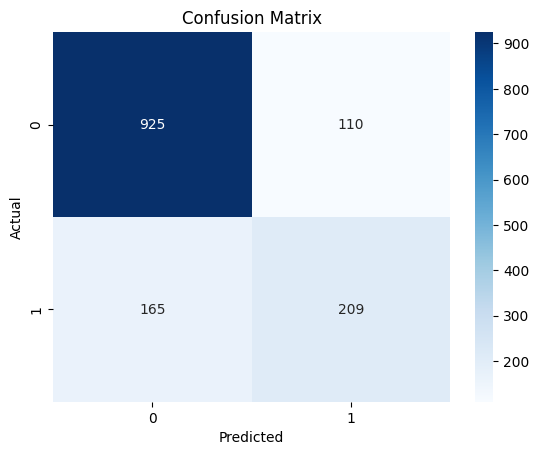

In [20]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [22]:
coeffs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)
print(coeffs.head(10))  # Top predictors

                           Feature  Coefficient
25               Contract_Two year    -1.339477
1                           tenure    -1.235351
10     InternetService_Fiber optic     1.193088
24               Contract_One year    -0.689997
3                     TotalCharges     0.506653
7                 PhoneService_Yes    -0.497523
2                   MonthlyCharges    -0.477347
23             StreamingMovies_Yes     0.380507
21                 StreamingTV_Yes     0.380205
28  PaymentMethod_Electronic check     0.379872


ROC AUC Score: 0.8419954015861943


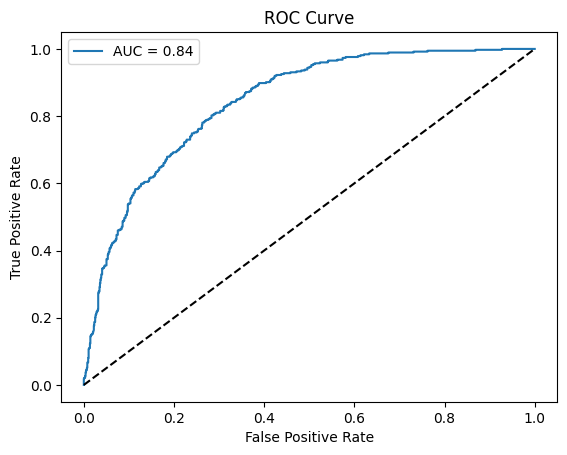

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
y_probs = logreg.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", auc)
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
rf = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    max_depth=10,        # Prevent overfitting (tune this)
    random_state=42      # For reproducibility
)

In [25]:
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_pred = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)[:, 1]  # For ROC AUC

In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_probs))

Confusion Matrix:
[[937  98]
 [174 200]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.53      0.60       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409


ROC AUC Score: 0.8427135808209977


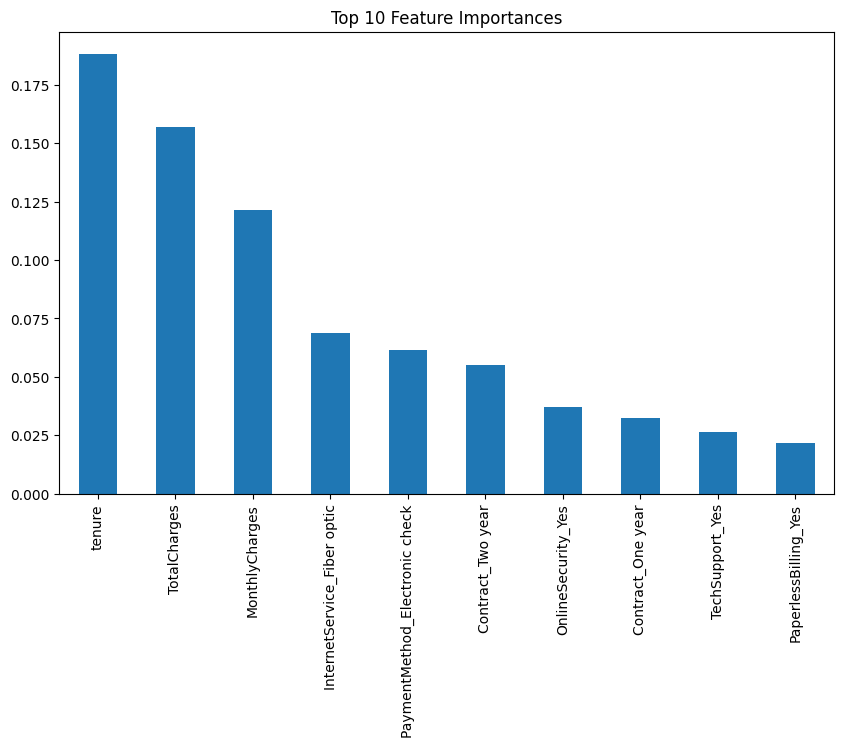

In [28]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_importances.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [30]:
# Define model
rf = RandomForestClassifier(random_state=42)

In [34]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [37]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,                  # 5-fold cross-validation
    n_jobs=-1,             # Use all cores
    scoring='roc_auc'      # Optimize for ROC AUC
)

In [38]:
# Fit grid search on training data
grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], 'n_estimators': [50, 100]}"
,scoring,'roc_auc'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [39]:
# Best parameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [40]:
# Use best estimator to predict test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_probs = best_rf.predict_proba(X_test)[:, 1]

In [41]:
# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [42]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[933 102]
 [175 199]]


In [43]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [44]:
print("\nROC AUC Score:", roc_auc_score(y_test, y_probs))


ROC AUC Score: 0.841208762820016


In [50]:
importances = best_rf.feature_importances_
features = X_train.columns

In [51]:
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

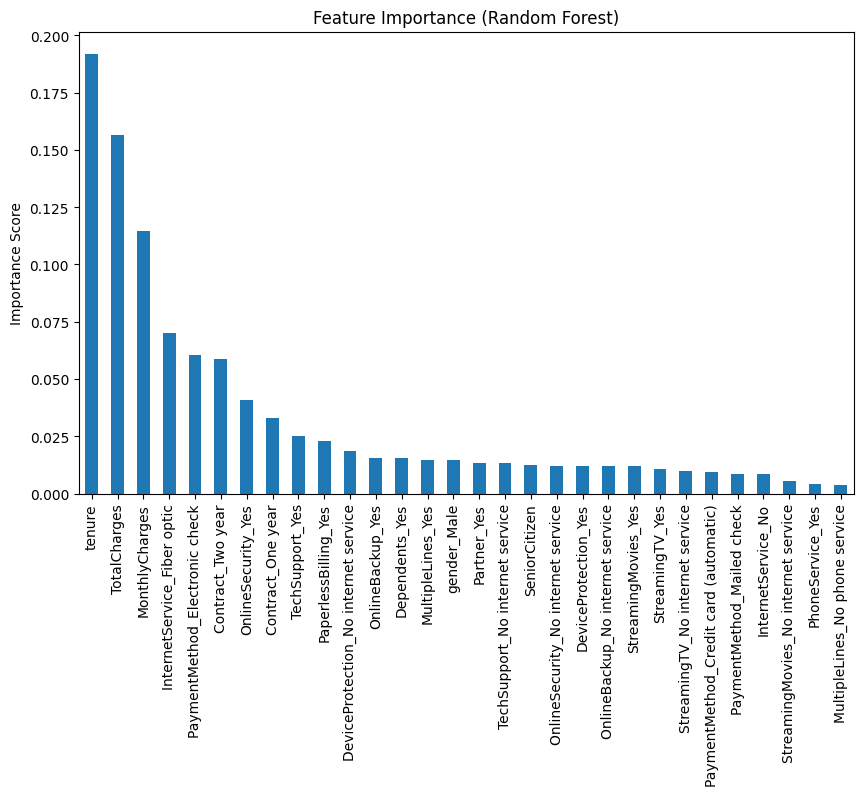

In [52]:
feat_importance.plot(kind='bar', figsize=(10, 6), title="Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()